<a href="https://colab.research.google.com/github/Ayakhaled200/EDA/blob/main/Aya_Khaled_Titanic_EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [2]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [3]:

df.isnull().sum().sum()  #no Nulls

0

## Removing duplicates
We can use .drop_duplicates()

In [4]:
df[df.duplicated()] #no duplicates
# df.drop_duplicates() #remove duplicates

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


## Quick View for the the data
We can use .describe() and .info()

In [5]:
df.info()  #no nulls in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Converting data types
Using .astype()

In [6]:
df.describe() #We have age as a float

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [7]:
## Converting data types
df['Age'] = df['Age'].astype(int)  #convert age into int
# df.info()
# df.describe()

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

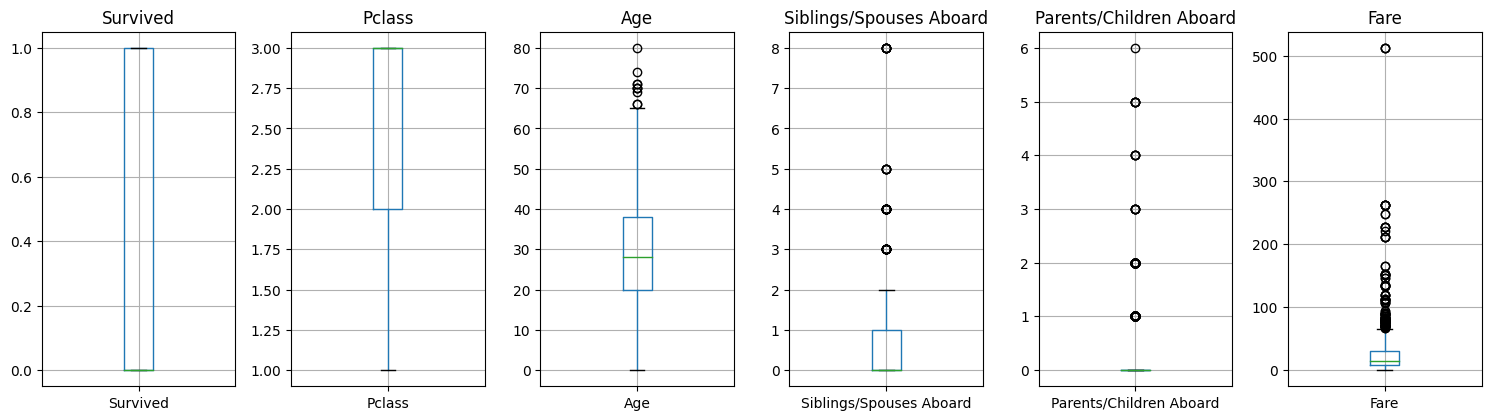

In [8]:
#box plots
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(20, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,8 , i)
    df.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

# Show the boxplots
plt.show()

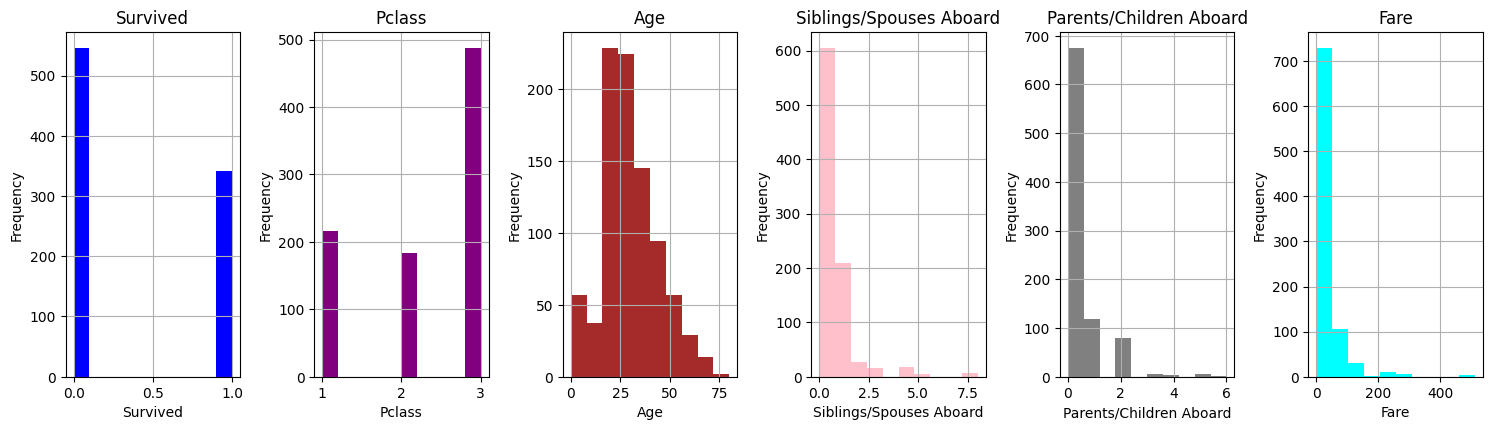

In [9]:
#histogram
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for numerical columns with different colors
plt.figure(figsize=(20, 8))
colors = ['blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 8, i)
    df[col].hist(color=colors[i-1])  # Use a different color for each histogram
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

# Show the histograms
plt.show()

##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    int64  
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 55.6+ KB


## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

# Data Preprocessing


## Renaming columns
Using .rename()

In [11]:
df = df.rename(columns={'Survived': 'Alive'})
df

,Alive,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26,0,0,30.0000


## Changing column order
Using .reindex()


In [12]:
df = df[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Alive']]
df

,Name,Sex,Age,Pclass,Fare,Siblings/Spouses Aboard,Parents/Children Aboard,Alive
0,Mr. Owen Harris Braund,male,22,3,7.2500,1,0,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,1,71.2833,1,0,1
2,Miss. Laina Heikkinen,female,26,3,7.9250,0,0,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,53.1000,1,0,1
4,Mr. William Henry Allen,male,35,3,8.0500,0,0,0
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,male,27,2,13.0000,0,0,0
883,Miss. Margaret Edith Graham,female,19,1,30.0000,0,0,1
884,Miss. Catherine Helen Johnston,female,7,3,23.4500,1,2,0
885,Mr. Karl Howell Behr,male,26,1,30.0000,0,0,1


## Dropping unnecessary columns
 Use .drop() in pandas.

In [20]:
df.drop(["Age", "Fare"], axis=1, inplace=True)

<ipython-input-20-2cc51fe757c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Age", "Fare"], axis=1, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     887 non-null    object 
 1   Sex                      887 non-null    object 
 2   Age                      887 non-null    int64  
 3   Pclass                   887 non-null    int64  
 4   Fare                     887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Alive                    887 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.6+ KB


## Encoding categorical variables


In [14]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Sex' column and assign the result directly to the original DataFrame using .loc
df.loc[:, 'Sex'] = label_encoder.fit_transform(df['Sex'])
df

,Name,Sex,Age,Pclass,Fare,Siblings/Spouses Aboard,Parents/Children Aboard,Alive
0,Mr. Owen Harris Braund,1,22,3,7.2500,1,0,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38,1,71.2833,1,0,1
2,Miss. Laina Heikkinen,0,26,3,7.9250,0,0,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35,1,53.1000,1,0,1
4,Mr. William Henry Allen,1,35,3,8.0500,0,0,0
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,1,27,2,13.0000,0,0,0
883,Miss. Margaret Edith Graham,0,19,1,30.0000,0,0,1
884,Miss. Catherine Helen Johnston,0,7,3,23.4500,1,2,0
885,Mr. Karl Howell Behr,1,26,1,30.0000,0,0,1


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

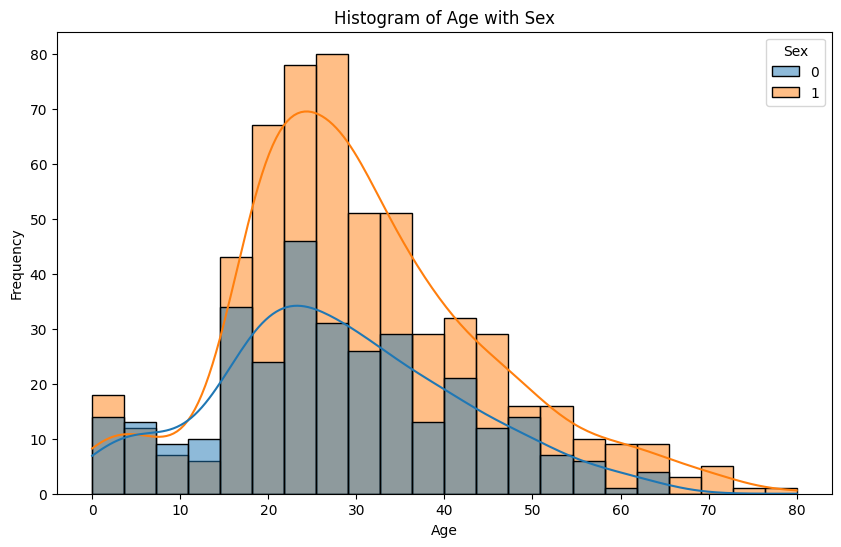

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', kde=True)
plt.title('Histogram of Age with Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

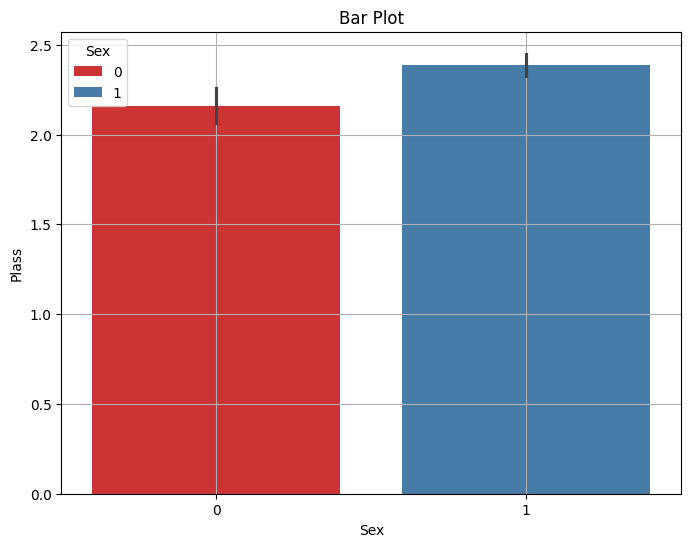

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sex', y='Pclass',hue='Sex',palette='Set1')
plt.xlabel('Sex')
plt.ylabel('Plass')
plt.title('Bar Plot')
plt.grid(True)
plt.show()

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

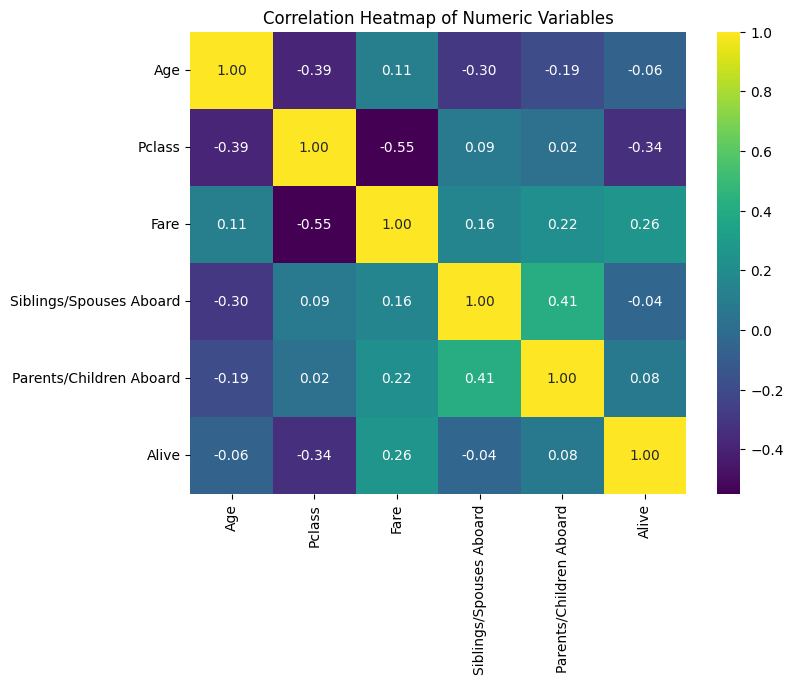

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()     #there us no strong corralation